<font size="+3" color=Blue><b> <center><u>Image Classification on any custom dataset</u></center></b></font>

# Objective

The aim of this kernel is to provide all the tips and tricks required to train image classification model on any given image dataset in a single page.This kernel will hold almost all steps and steps required to implement image classification algorithm using SOTA such as ResNET on any given dataset.It could be a great time saver for you.Just utilize it anytime when you are working on Image Classification.

I have learned them from [FastAI](https://docs.fast.ai/)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Deep Learning ?](#1)
* [2. What is CNN ?](#2)

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#3)
* [2. Import Libraries ](#4)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#5)
* [2. Data Loading For training ](#6)
* [3. Data Explorations ](#7)
* [4. Print Classes present in the data ](#8)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#9)
* [2. Train Model ](#11)
* [3. Finding LR ](#10)
* [4. Finetuning HyperParameter](#12)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#13)
* [2. Prediction Using Trained Model](#14)
* [3. Save and Load Model](#15)
* [4. Sources](#16)

<a id="1"></a>
<font color="blue" size=+2.5><b>1.1  What is Deep Learning ?</b></font>
<br/>
<br/>
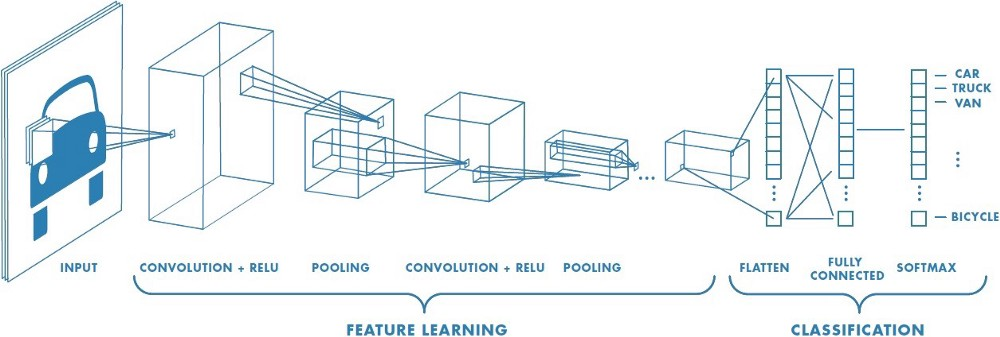
<br/>
<br/>

*Deep learning is a subset of machine learning concerned with the emulation of human brain activities in software programs using layers of artificial neural networks (ANN), which work similar to the human brain at some levels.*

<a id="2"></a>
<font color="blue" size=+2.5><b>1.2 What is CNN ?</b></font>
<br/>
<br/>
CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

<a id="3"></a>
<font color="blue" size=+2.5><b>2.1 Installation of Libraries </b></font>

## !pip install fastai

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [11]:
#importing libraries
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#Additional Libraries
import fastai
from pathlib import Path
import os
from datetime import datetime

In [12]:
print("FastAI Version: ",fastai.__version__)

FastAI Version:  2.7.14


### Function to calculate and print elapsed time

In [13]:
def print_elapsed_time(process_step, start_time, end_time):
    """
    Print the elapsed time for a given process step from start_time to end_time in Days, Hours, Minutes, and Seconds.
    
    Parameters:
    - start_time: datetime instance when the timer starts
    - end_time: datetime instance when the timer ends
    - process_step: string describing the process step
    """
    # Calculate the time difference
    time_diff = end_time - start_time

    # Extract days, hours, minutes, and seconds
    days = time_diff.days
    seconds = time_diff.seconds
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60

    # Print the process step and the elapsed time in the specified format
    print(f"Process Step: {process_step}")
    print(f"Elapsed time: {days} Days, {hours} Hours, {minutes} Minutes, {seconds} Seconds")

<a id="5"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [14]:
# Get the current working directory
current_path = os.getcwd()
print("Current Path: ", current_path)



Current Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1


In [15]:
dataset_train_path = r'intel image classification\seg_train'
full_dataset_train_path = os.path.join(current_path, dataset_train_path)
print("Full Dataset Train Path: ", full_dataset_train_path)

# List sub-folders in the full_dataset_train_path
train_sub_folders = [f.name for f in os.scandir(full_dataset_train_path) if f.is_dir()]
print("Sub-folders in the dataset train path:",train_sub_folders)

Full Dataset Train Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_train
Sub-folders in the dataset train path: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [16]:
dataset_test_path = r'intel image classification\seg_test'
full_dataset_test_path = os.path.join(current_path, dataset_test_path)
print("Full Dataset Test Path: ", full_dataset_test_path)

# List sub-folders in the full_dataset_test_path
test_sub_folders = [f.name for f in os.scandir(full_dataset_test_path) if f.is_dir()]
print("Sub-folders in the dataset test path:",test_sub_folders)

Full Dataset Test Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_test
Sub-folders in the dataset test path: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [17]:
dataset_predict_path = r'intel image classification\seg_pred'
full_dataset_predict_path = os.path.join(current_path, dataset_predict_path)
print("Full Dataset Predict Path: ", full_dataset_predict_path)

# List sub-folders in the full_dataset_predict_path
predict_sub_folders = [f.name for f in os.scandir(full_dataset_predict_path) if f.is_dir()]
print("Sub-folders in the dataset predict path:",predict_sub_folders)

Full Dataset Predict Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_pred
Sub-folders in the dataset predict path: []


<a id="6"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

np.random.seed(40)
data = ImageDataBunch.from_folder(full_dataset_training_path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [18]:
print(fastai.__version__)

2.7.14


In [19]:
from fastai.vision.all import *

data = ImageDataLoaders.from_folder(full_dataset_train_path, train='.', valid_pct=0.2,
                                    item_tfms=Resize(224), 
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)], 
                                    num_workers=4)

<a id="7"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

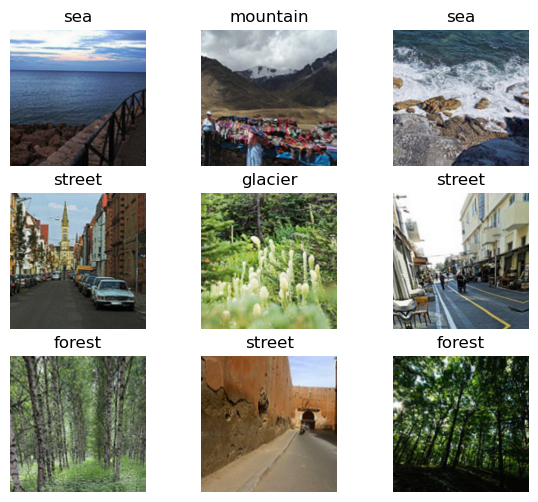

In [20]:
## data.show_batch(nrows=3, figsize=(7,6),recompute_scale_factor=True)
data.show_batch(nrows=3, figsize=(7,6))

<a id="8"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [21]:
data

print(data.classes)
len(data.classes)
data.c

In [22]:
# To get the list of classes
print(data.vocab)
# Output: ['class1', 'class2', ...]

# To get the number of classes
print(len(data.vocab))
# Output: Number of classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


<a id="9"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
* We now use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 2500 images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [23]:
## learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

In [24]:
process_step = "Create Model"
start_time = datetime.now()

learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir=Path('../kaggle/working'), path=Path("."))

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

Process Step: Create Model
Elapsed time: 0 Days, 0 Hours, 0 Minutes, 0 Seconds


<a id="10"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

Process Step: Finding Learning Rate
Elapsed time: 0 Days, 0 Hours, 8 Minutes, 22 Seconds


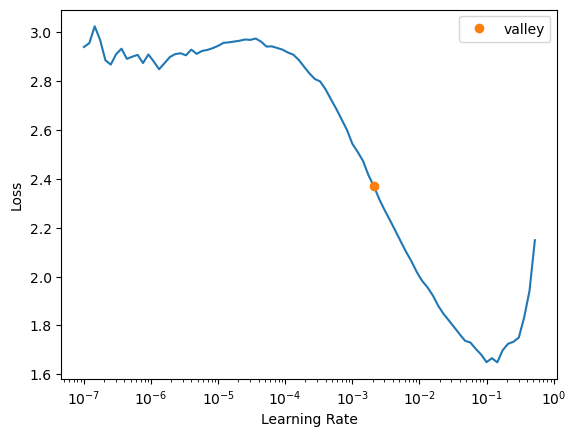

In [25]:
process_step = "Finding Learning Rate"
start_time = datetime.now()

# Find the optimal learning rate
learn.lr_find()

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

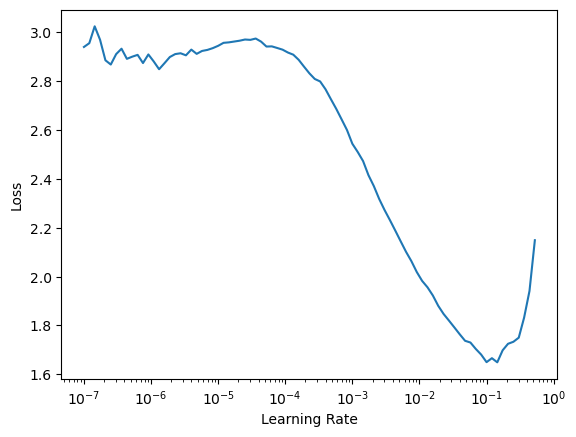

In [26]:
# To plot the learning rate graph
learn.recorder.plot_lr_find()

<a id="11"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [27]:
process_step = "Train Model"
start_time = datetime.now()

training_epochs = 2     # NB 20 is normal setting, reduced to 2 for development purposes
learning_rate_layers_earliest = 1e-3
learning_rate_layers_last = 1e-1

learn.fit_one_cycle(training_epochs, slice(learning_rate_layers_earliest,learning_rate_layers_last))

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)


epoch,train_loss,valid_loss,accuracy,time
0,0.937398,0.554353,0.866358,18:08
1,0.350375,0.563982,0.923022,17:55


Process Step: Train Model
Elapsed time: 0 Days, 0 Hours, 36 Minutes, 4 Seconds


<a id="12"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>


In [28]:
# learn.unfreeze()
# learn.fit_one_cycle(20,slice(1e-4,1e-3))


#### Unfreeze all the layers of the model.
Initially, when using transfer learning, the pre-trained layers are frozen, meaning their weights are not updated during training.
Unfreezing them allows all the layers' weights to be updated during training based on the new data.

In [29]:
process_step = "Unfreeze Layer Weights"
start_time = datetime.now()

learn.unfreeze()


end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

Process Step: Unfreeze Layer Weights
Elapsed time: 0 Days, 0 Hours, 0 Minutes, 0 Seconds


#### Fit the model using the "1cycle" learning rate policy for 20 epochs.
The "One cycle" policy is a training method that starts with a lower learning rate, gradually increases it, and then decreases it.
This approach can help in achieving better performance and faster convergence.
#### Parameters:
20: Number of epochs to train for. An epoch is one complete pass through the entire training dataset.
slice(1e-4,1e-3): This sets the learning rates for the unfrozen layers.
The first value (1e-4 or 0.0001) is the starting learning rate for the earliest layers.
The second value (1e-3 or 0.001) is the learning rate for the last layer.
The layers in between will have learning rates that gradually increase from the first value to the second value.
This technique is known as discriminative learning rates, where earlier layers (which capture more general information)
have smaller learning rates, and later layers (more specific to the current task) have higher learning rates.

In [30]:
process_step = "One cycle training"
start_time = datetime.now()

tuning_epochs = 2   ### NB 20 is normal setting, reduced to 2 for development purposes
learning_rate_layers_earliest = 1e-4
learning_rate_layers_last = 1e-3

learn.fit_one_cycle(tuning_epochs, slice(learning_rate_layers_earliest,learning_rate_layers_last))

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

epoch,train_loss,valid_loss,accuracy,time
0,0.329743,0.287106,0.907698,25:43
1,0.216526,0.288792,0.934783,24:40


Process Step: One cycle training
Elapsed time: 0 Days, 0 Hours, 50 Minutes, 24 Seconds


In [31]:
## learn.recorder.plot_losses()

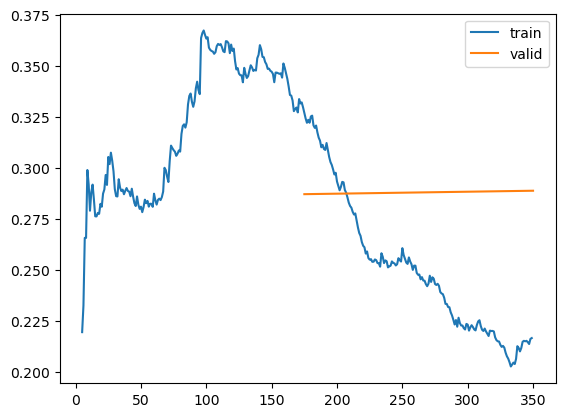

In [32]:
learn.recorder.plot_loss()

# <a id="13"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

Process Step: Interpret Results/Confusion Matrix
Elapsed time: 0 Days, 0 Hours, 4 Minutes, 16 Seconds


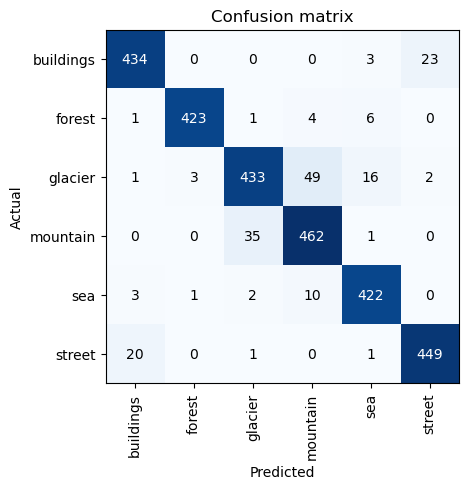

In [33]:
process_step = "Interpret Results/Confusion Matrix"
start_time = datetime.now()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

In [34]:
# Validate the model and print the accuracy
val_loss, val_acc = learn.validate()
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

Validation Loss: 0.2887915372848511
Validation Accuracy: 0.9347826242446899


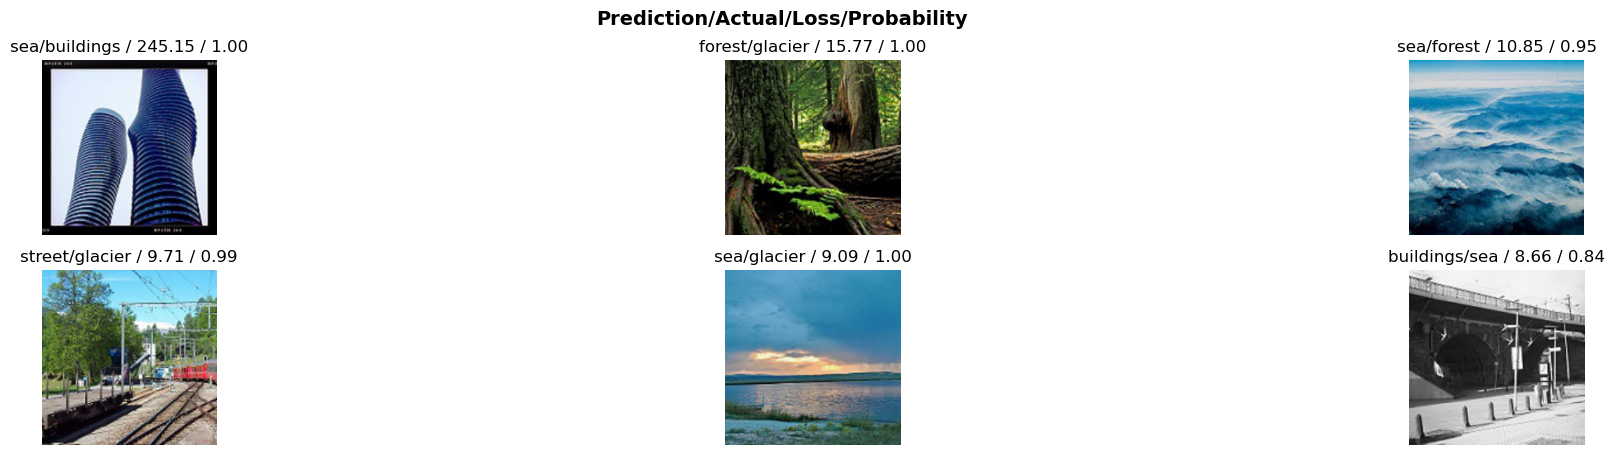

In [35]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="14"></a>
<font color="blue" size=+2.5><b>5.2 Prediction Using Trained Model</b></font>

In [36]:
## img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
## print(learn.predict(img)[0])

In [37]:
# Construct the path to the image you want to predict
image_path = os.path.join(full_dataset_test_path, 'glacier', '21982.jpg')

# Open the image using FastAI's method (ensure you use the correct function based on your version of FastAI)
img = PILImage.create(image_path)

# Use the model to predict the class of the image
prediction = learn.predict(img)
print(prediction[0])  # This will print the predicted class label


glacier


<a id="15"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>

In [38]:
### learn.export(file = Path("/kaggle/working/export.pkl"))
### learn.model_dir = "/kaggle/working"
### learn.save("stage-1",return_path=True)

In [39]:
# Define the model directory relative to current_path
model_dir = os.path.join(current_path, 'model')

# Create the model directory if it does not exist
os.makedirs(model_dir, exist_ok=True)

Method in FastAI, you are creating an actual .pkl (pickle) file. This file is a binary file that contains the serialized version of the Learner object from FastAI.

The .pkl file created by the export method includes:

The architecture of the model.
The trained parameters (weights and biases).
The state of the optimizer (if it was saved with the model).
The DataLoaders, including the class to index mapping, transformations, and other preprocessing information.
This file can be used to quickly load the trained model with FastAI's load_learner function for inference without needing to redefine the model architecture or the DataLoader. It's particularly useful for deployment or sharing models, as the receiver of the .pkl file can easily use the model without needing to know how it was constructed or trained.

In [40]:
# Export the learner to the model directory with the correct argument name
learn.export(fname = Path(model_dir) / "sd_image_classification.pkl")


In [41]:
# Set the model directory in the learner
learn.model_dir = Path(model_dir)

# Save the learner's model
model_path = learn.save("stage-1", with_opt=False)  # If return_path=True causes an error, remove it

# Print the model's saved path for confirmation
print(f"Model saved to: {model_path}")

Model saved to: C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\model\stage-1.pth


<a id="16"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>